In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import cv2
import os
import PIL

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin =  dataset_url, cache_dir = '.', untar = True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3671

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]
             

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

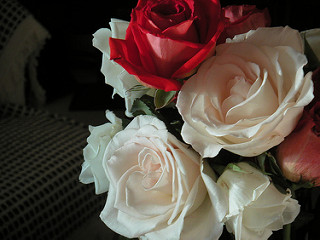

In [7]:
PIL.Image.open(str(roses[1]))

In [8]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

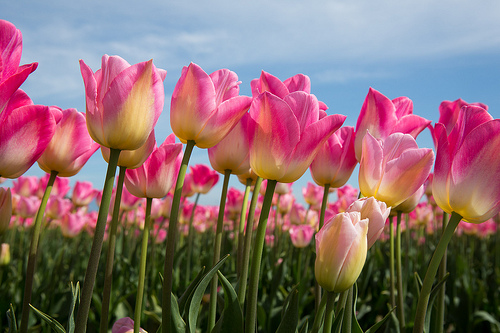

In [9]:
PIL.Image.open(str(tulips[3]))

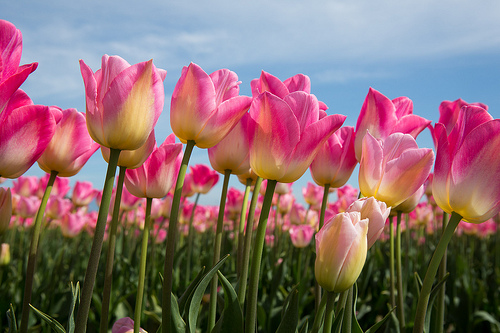

In [10]:
def show_im(flower, index):
    return PIL.Image.open(str(flower[index]))
show_im(tulips, 3)

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [13]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [19]:
len(X_train)

2753

In [20]:
len(X_test)

918

In [21]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [49]:
model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding ='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)
model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.2990 - loss: 1.7618
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.5471 - loss: 1.1140
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.6603 - loss: 0.9243
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.7194 - loss: 0.7611
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.8168 - loss: 0.5221
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.8966 - loss: 0.2984
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.9382 - loss: 0.1877
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.9055 - loss: 0.2648
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.9828 - loss: 0.0685
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.9850 - loss: 0.0653


In [51]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5382 - loss: 2.4927


[2.387913465499878, 0.5544662475585938]

In [55]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


array([[ 10.928295  ,   7.6406927 ,   2.9806616 ,  -3.836101  ,
          1.1474537 ],
       [ 10.201574  ,  -0.2992581 , -11.116135  ,  -6.359019  ,
         19.368582  ],
       [ -6.031015  ,  -4.674859  ,  -0.04228149,   4.943087  ,
          2.0872533 ],
       ...,
       [ -4.5587506 ,  -5.8161483 ,  -1.1367009 ,   3.8793724 ,
          7.920688  ],
       [  0.10339629,   0.7352842 ,  -1.3298609 ,  -0.8593955 ,
          2.0565212 ],
       [ -5.498345  ,  -3.5961442 ,   2.6348653 ,   3.6343827 ,
          0.0514175 ]], dtype=float32)

In [57]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.6361989e-01, 3.5984721e-02, 3.4063740e-04, 3.7308666e-07,
       5.4467837e-05], dtype=float32)>

In [59]:
np.argmax(score)

0

In [61]:
y_test[0]

0

In [125]:
augmentation = keras.Sequential([
    layers.RandomFlip('horizontal', input_shape = (180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

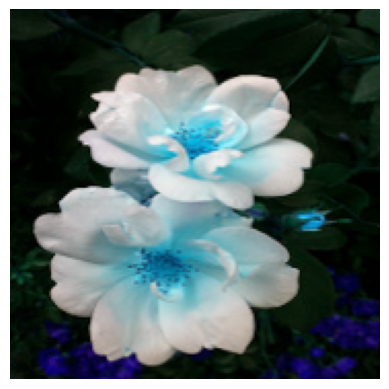

In [81]:
plt.axis('off')
plt.imshow(X[0])

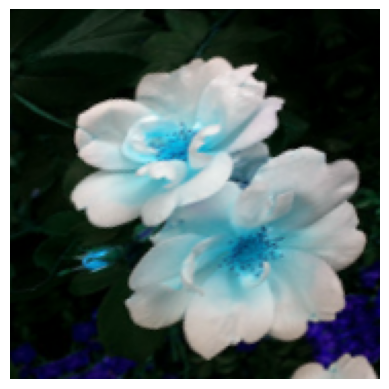

In [99]:
plt.axis('off')
plt.imshow(augmentation(X)[0].numpy().astype('uint8'))

In [127]:
model = Sequential([
    augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),
    layers.Flatten(),

    layers.Dense(128, activation = 'relu'),
    layers.Dense(5)
])
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)
model.fit(X_train_scaled, y_train, epochs = 15)

Epoch 1/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.2935 - loss: 1.6675
Epoch 2/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - accuracy: 0.5021 - loss: 1.1480
Epoch 3/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.5944 - loss: 0.9941
Epoch 4/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.6247 - loss: 0.9598
Epoch 5/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.6643 - loss: 0.8564
Epoch 6/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.6860 - loss: 0.8415
Epoch 7/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.6659 - loss: 0.8336
Epoch 8/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.6734 - loss: 0.8238
Epoch 9/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.6523 - loss: 0.8335
Epoch 10/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step - accuracy: 0.6982 - loss: 0.7879
Epoch 11/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.7434 - loss: 0.6590
Epoch 12/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 15

In [129]:
model.evaluate(X_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6069 - loss: 194.1330


[223.94761657714844, 0.5936819314956665]